# Machine learning - KNN

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
# plot figures in line
%matplotlib inline 

In [4]:
# import data from csv
df=pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [11]:
cols=df.columns # get all columns' names

In [12]:
# convert Pandas data frame to Numpy array
# last columns is what we need use as y
X=df[cols[0:-1]].values
y=df[cols[-1]].values

In [13]:
# Normalize data
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [14]:
# train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [15]:
#train and predict
k=4 # set k = 4 here
knn=KNeighborsClassifier(k)
neigh=knn.fit(X_train,y_train)
y_pred=neigh.predict(X_test)

In [16]:
# evaluation
accuracy=metrics.accuracy_score(y_test,y_pred)

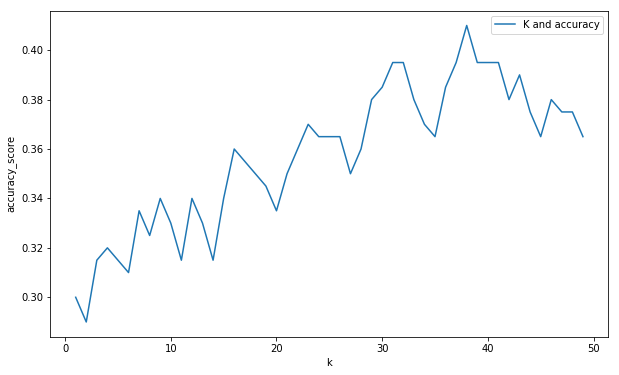

In [20]:
# evaluate the relationship between k and accuracy
accuracy=[]
for k in range(1,50):
    knn=KNeighborsClassifier(k)
    y_pred=knn.fit(X_train,y_train).predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy,label='K and accuracy')
plt.xlabel('k')
plt.ylabel('accuracy_score')
plt.legend(loc='best')

The accuracy increases first as k becomes larger, but decreases when k is over around 40.  